In [1261]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [1262]:
womens_stats = pd.read_csv('wbb_stats.csv')

In [1263]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                         object
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [1264]:
womens_stats = womens_stats.replace(to_replace = ['Win','Loss'],value = ['1','0'])

In [1265]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                         object
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [1266]:
womens_stats['Win_Or_Loss'] = womens_stats['Win_Or_Loss'].astype(str).astype(int)

In [1267]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                          int32
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [1268]:
womens_stats_num = womens_stats.drop(columns = {'Date_Of_Game', 'Team_1', 'Team_2'})

In [1269]:
womens_stats_num_without_game_id = womens_stats_num.drop(columns = {'Game_ID'})

In [1270]:
womens_stats_num_without_game_id_corr = womens_stats_num_without_game_id.corr()

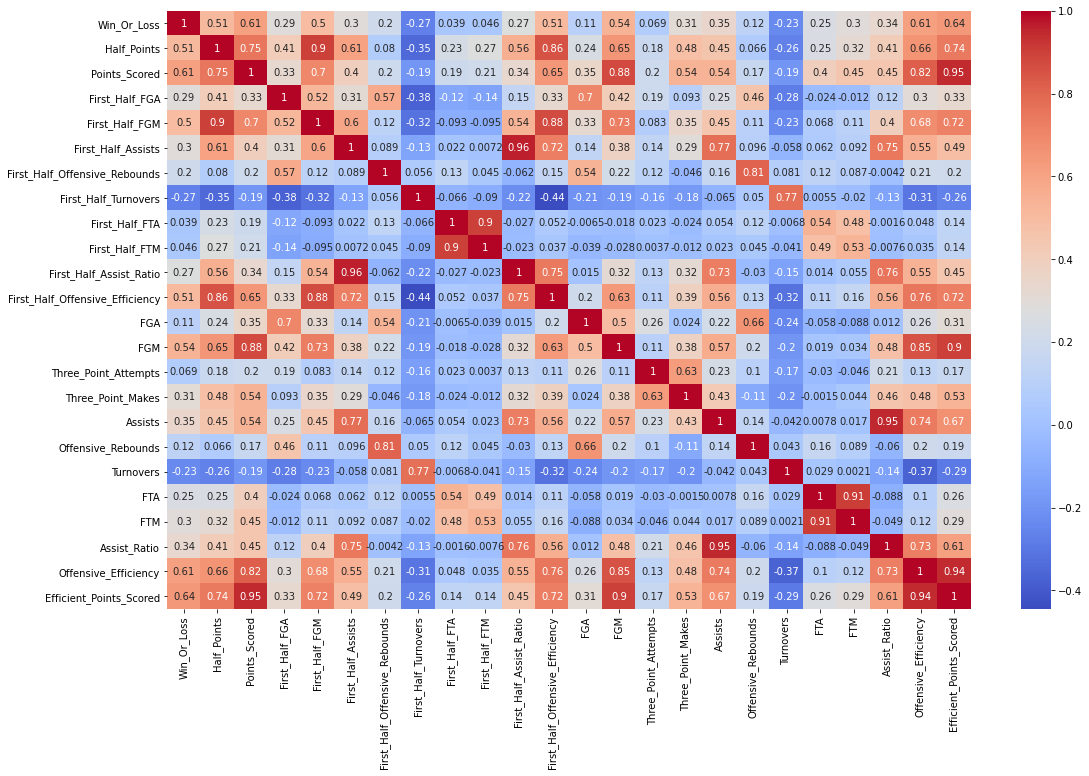

In [1271]:
plt.figure(figsize=(18,11))
sns.heatmap(womens_stats_num_without_game_id_corr, annot = True, cmap = "coolwarm");

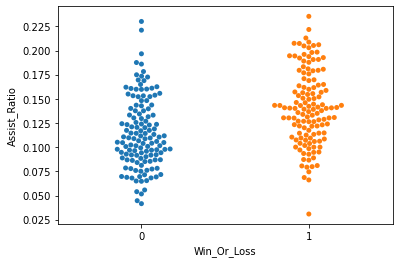

In [1272]:
sns.swarmplot(x = womens_stats.Win_Or_Loss, y = womens_stats.Assist_Ratio);

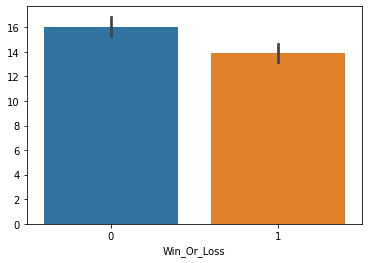

In [1273]:
sns.barplot( x = womens_stats.Win_Or_Loss, y = womens_stats[['Turnovers']].mean(axis = 1));

In [1274]:
womens_stats.Team_1.unique()

array(['St. Scholastica', 'UWEC', 'Bethel', 'Simpson', 'Wartburg',
       'Carleton', 'Loras', 'St. Norbert', 'St. Catherine',
       'Framingham St.', 'Salve Regina', 'UWW', 'UWS', 'UWP', 'UWO',
       'UWSP', 'UWRF', 'UWL', 'Superior', 'Calvin', "St. Mary's",
       'St. Thomas', 'Augustana', 'DePauw', 'Ohio Northern', 'Alma',
       'Lawrence', 'Pacific Lutheran', 'Puget Sound', 'Ripon', 'Edgewood',
       'Bethany Lutheran', 'Carroll', 'Coe', 'Cornell', 'Luther',
       'Finlandia', 'Lake Forest', 'Viterbo', 'Washington',
       'Illinois Wesleyan', 'Northwestern', 'Dubuque', 'Salisbury',
       'Husson', 'North Central'], dtype=object)

In [1275]:
womens_stats['Team_1_ID'] = womens_stats.groupby(['Team_1']).ngroup()

In [1276]:
game = womens_stats.merge(womens_stats, how='outer', on='Game_ID')
game = game.loc[game.Win_Or_Loss_x != game.Win_Or_Loss_y]

In [1277]:
game = game.drop_duplicates(['Game_ID'])
game = game.reset_index(drop = True)
game

,Game_ID,Date_Of_Game_x,Team_1_x,Team_2_x,Win_Or_Loss_x,Half_Points_x,Points_Scored_x,First_Half_FGA_x,First_Half_FGM_x,First_Half_Assists_x,First_Half_Offensive_Rebounds_x,First_Half_Turnovers_x,First_Half_FTA_x,First_Half_FTM_x,First_Half_Assist_Ratio_x,First_Half_Offensive_Efficiency_x,FGA_x,FGM_x,Three_Point_Attempts_x,Three_Point_Makes_x,Assists_x,Offensive_Rebounds_x,Turnovers_x,FTA_x,FTM_x,Assist_Ratio_x,Offensive_Efficiency_x,Efficient_Points_Scored_x,Team_1_ID_x,Date_Of_Game_y,Team_1_y,Team_2_y,Win_Or_Loss_y,Half_Points_y,Points_Scored_y,First_Half_FGA_y,First_Half_FGM_y,First_Half_Assists_y,First_Half_Offensive_Rebounds_y,First_Half_Turnovers_y,First_Half_FTA_y,First_Half_FTM_y,First_Half_Assist_Ratio_y,First_Half_Offensive_Efficiency_y,FGA_y,FGM_y,Three_Point_Attempts_y,Three_Point_Makes_y,Assists_y,Offensive_Rebounds_y,Turnovers_y,FTA_y,FTM_y,Assist_Ratio_y,Offensive_Efficiency_y,Efficient_Points_Scored_y,Team_1_ID_y
0,1,11/8/2019,St. Scholastica,UWEC,0,11,33,26,3,0,0,8,4,4,0.000000,0.088235,54,9,18,3,3,8,16,16,12,0.041644,0.184615,6.092308,32,11/8/2019,UWEC,St. Scholastica,1,34,71,40,13,8,15,7,10,6,0.134680,0.525000,69,28,20,6,20,21,16,13,9,0.180636,0.571429,40.571429,35
1,2,11/12/2019,Bethel,UWEC,1,43,77,32,15,10,5,4,16,10,0.188537,0.609756,62,26,24,7,14,12,17,27,18,0.140168,0.493827,38.024691,3,11/12/2019,UWEC,Bethel,0,30,54,23,9,2,3,17,12,10,0.042301,0.282051,46,19,12,2,4,5,32,17,14,0.044703,0.298701,16.129870,35
2,3,11/15/2019,UWEC,Simpson,0,35,63,33,13,11,2,7,12,9,0.195451,0.489796,59,23,20,4,20,4,15,17,13,0.221043,0.477778,30.100000,35,11/15/2019,Simpson,UWEC,1,44,84,33,15,11,3,7,11,8,0.196991,0.541667,56,28,28,13,20,8,18,21,15,0.193723,0.558140,46.883721,28
3,4,11/16/2019,UWEC,Wartburg,0,31,54,29,12,5,2,4,4,3,0.125755,0.472222,54,21,28,8,12,6,11,6,4,0.160772,0.464789,25.098592,35,11/16/2019,Wartburg,UWEC,1,35,69,28,11,7,2,7,9,7,0.152306,0.450000,52,23,28,8,12,5,12,20,15,0.141509,0.492958,34.014085,44
4,5,11/20/2019,Carleton,UWEC,0,29,50,27,11,6,3,6,5,5,0.145631,0.472222,55,20,21,4,9,5,11,6,6,0.125628,0.414286,20.714286,5,11/20/2019,UWEC,Carleton,1,41,75,29,15,8,4,3,6,5,0.187617,0.638889,61,29,21,9,18,13,8,11,8,0.195993,0.635135,47.635135,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,2/24/2021,UWEC,UWO,0,25,56,26,10,4,1,4,4,2,0.111857,0.424242,56,20,27,8,11,5,10,11,8,0.134409,0.430556,24.111111,35,2/24/2021,UWO,UWEC,1,34,63,27,12,10,1,3,4,3,0.239464,0.564103,52,22,24,10,14,3,9,17,9,0.169738,0.500000,31.500000,37
126,127,2/26/2021,UWO,UWEC,0,28,62,26,12,4,1,8,2,2,0.102881,0.432432,51,24,16,5,10,3,15,15,9,0.121065,0.465753,28.876712,37,2/26/2021,UWEC,UWO,1,29,64,20,8,2,0,8,13,10,0.055991,0.333333,43,19,12,7,9,1,16,24,19,0.114562,0.417910,26.746269,35
127,128,3/1/2021,UWP,UWEC,0,30,56,28,11,9,2,6,5,5,0.199115,0.487805,53,21,14,3,15,5,16,11,11,0.168843,0.455696,25.518987,38,3/1/2021,UWEC,UWP,1,42,81,30,15,3,2,5,5,4,0.074627,0.500000,53,26,22,12,11,5,12,19,17,0.130394,0.521127,42.211268,35
128,129,2/10/2021,UWSP,UWP,1,32,74,23,10,6,1,8,10,9,0.144928,0.444444,56,26,9,4,9,10,12,22,18,0.103830,0.522388,38.656716,41,2/10/2021,UWP,UWSP,0,34,69,29,13,5,3,7,4,1,0.116932,0.473684,59,23,20,8,8,9,10,23,15,0.091827,0.455882,31.455882,38


In [1278]:
game.dtypes

Game_ID                                int64
Date_Of_Game_x                        object
Team_1_x                              object
Team_2_x                              object
Win_Or_Loss_x                          int32
Half_Points_x                          int64
Points_Scored_x                        int64
First_Half_FGA_x                       int64
First_Half_FGM_x                       int64
First_Half_Assists_x                   int64
First_Half_Offensive_Rebounds_x        int64
First_Half_Turnovers_x                 int64
First_Half_FTA_x                       int64
First_Half_FTM_x                       int64
First_Half_Assist_Ratio_x            float64
First_Half_Offensive_Efficiency_x    float64
FGA_x                                  int64
FGM_x                                  int64
Three_Point_Attempts_x                 int64
Three_Point_Makes_x                    int64
Assists_x                              int64
Offensive_Rebounds_x                   int64
Turnovers_

In [1279]:
game = game.rename(columns = {'Date_Of_Game_x': 'Date_Of_Game', 'Team_1_x': 'Team_x', 'Team_2_x' : 'Team_y', 'Team_1_ID_x': 'Team_x_ID', 'Team_1_ID_y': 'Team_y_ID'})
game = game.drop(columns = {'Team_1_y', 'Team_2_y', 'Date_Of_Game_y'})

In [1280]:
game.dtypes

Game_ID                                int64
Date_Of_Game                          object
Team_x                                object
Team_y                                object
Win_Or_Loss_x                          int32
Half_Points_x                          int64
Points_Scored_x                        int64
First_Half_FGA_x                       int64
First_Half_FGM_x                       int64
First_Half_Assists_x                   int64
First_Half_Offensive_Rebounds_x        int64
First_Half_Turnovers_x                 int64
First_Half_FTA_x                       int64
First_Half_FTM_x                       int64
First_Half_Assist_Ratio_x            float64
First_Half_Offensive_Efficiency_x    float64
FGA_x                                  int64
FGM_x                                  int64
Three_Point_Attempts_x                 int64
Three_Point_Makes_x                    int64
Assists_x                              int64
Offensive_Rebounds_x                   int64
Turnovers_

In [1281]:
game_num = game.drop(columns = {'Game_ID', 'Date_Of_Game', 'Team_x', 'Team_y', 'Team_x_ID', 'Team_y_ID'})

In [1282]:
game_num_corr = game_num.corr().abs()
sorted_mat = pd.DataFrame(game_num_corr.unstack().sort_values(ascending = False).drop_duplicates())

In [1283]:
highest_correlations = sorted_mat[sorted_mat[0] > 0.7]

In [1284]:
highest_correlations

,,0
Win_Or_Loss_x,Win_Or_Loss_x,1.000000
First_Half_Assists_x,First_Half_Assist_Ratio_x,0.965433
Assists_y,Assist_Ratio_y,0.959152
First_Half_Assist_Ratio_y,First_Half_Assists_y,0.957092
Offensive_Efficiency_y,Efficient_Points_Scored_y,0.951681
Assists_x,Assist_Ratio_x,0.948425
Efficient_Points_Scored_y,Points_Scored_y,0.948066
Points_Scored_x,Efficient_Points_Scored_x,0.947921
Offensive_Efficiency_x,Efficient_Points_Scored_x,0.936803
First_Half_FGM_x,Half_Points_x,0.913846


In [1285]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [1286]:
# Win or loss machine learning classifier
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})

In [1287]:
X = features
X
y = game_num['Win_Or_Loss_x']

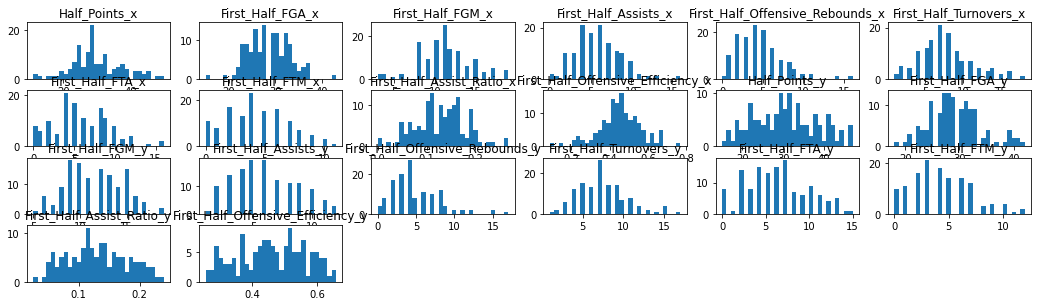

In [1288]:
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(9, 6, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])

In [1289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )

In [1290]:
from sklearn.metrics import accuracy_score
log = LogisticRegression(max_iter = 1000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)

In [1291]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)

In [1292]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)

In [1293]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)

In [1294]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)

In [1295]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)

[17:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [1296]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, y_pred)

In [1297]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log", max_iter=500)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, y_pred)

In [1298]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier (estimators = [('sgd', sgd), ('clf', clf), ('log', log), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard')
voting_clf_hard.fit(X_train, y_train)
y_pred = voting_clf_hard.predict(X_test)
voting_clf_hard_acc = accuracy_score(y_test, y_pred)

[17:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [1299]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier (estimators = [('sgd', sgd), ('clf', clf), ('log', log), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred = voting_clf_soft.predict(X_test)
voting_clf_soft_acc = accuracy_score(y_test, y_pred)

[17:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [1300]:
# Putting all into one dataframe to compare
accuracy_data_frame = [log_acc, dt_acc, knn_acc, rf_acc, svc_acc, xgb_acc, clf_acc, sgd_acc, voting_clf_hard_acc, voting_clf_soft_acc]
accuracy_data_frame = pd.DataFrame(accuracy_data_frame)

In [1301]:
# Win or loss prediction accuracy
accuracy_data_frame.rename(index = {0: "Logistic Regression", 1: "Decision Tree", 2: "K-Nearest Neighbor", 3: "Random Forest",4: "SVC", 5: "XGB", 6: "Naive Bayes", 7: "SGD", 8: "Voting CLF Hard", 9: "Voting CLF Soft"})

,0
Logistic Regression,0.848485
Decision Tree,0.696970
K-Nearest Neighbor,0.787879
Random Forest,0.787879
SVC,0.818182
XGB,0.787879
Naive Bayes,0.787879
SGD,0.787879
Voting CLF Hard,0.787879
Voting CLF Soft,0.818182


In [1302]:
X.dtypes

Half_Points_x                          int64
First_Half_FGA_x                       int64
First_Half_FGM_x                       int64
First_Half_Assists_x                   int64
First_Half_Offensive_Rebounds_x        int64
First_Half_Turnovers_x                 int64
First_Half_FTA_x                       int64
First_Half_FTM_x                       int64
First_Half_Assist_Ratio_x            float64
First_Half_Offensive_Efficiency_x    float64
Half_Points_y                          int64
First_Half_FGA_y                       int64
First_Half_FGM_y                       int64
First_Half_Assists_y                   int64
First_Half_Offensive_Rebounds_y        int64
First_Half_Turnovers_y                 int64
First_Half_FTA_y                       int64
First_Half_FTM_y                       int64
First_Half_Assist_Ratio_y            float64
First_Half_Offensive_Efficiency_y    float64
dtype: object

In [1303]:
# For every one-unit increase in [X variable], the odds that the observation is in (y class) are [coefficient] times as large as the odds that the observation is not in (y class) when all other variables are held constant.

importance = log.coef_
importance_in_line = importance.transpose() 
importance_in_line = pd.DataFrame(data = importance_in_line)
importance_in_line = importance_in_line.rename(index = {0: 'Half_Points_x', 1: 'First_Half_FGA_x', 2: 'First_Half_FGM_x', 3: 'First_Half_Assists_x', 4: 'First_Half_Offensive_Rebounds_x', 5: 'First_Half_Turnover_x', 6: 'First_Half_FTA_x', 7: 'First_Half_FTM_x', 8: 'First_Half_Assost_Ratio_x', 9: 'First_Half_Offensive_Efficiency_x', 10: 'Half_Points_y', 11: 'First_Half_FGA_y', 12: 'First_Half_FGM_y', 13: 'First_Half_Assists_y', 14: 'First_Half_Offensive_Rebounds_y', 15: 'First_Half_Turnover_y', 16: 'First_Half_FTA_y', 17: 'First_Half_FTM_y', 18: 'First_Half_Assist_Ratio_y', 19: 'First_Half_Offensive_Efficiency_y'})
#importance_in_line.to_csv('win_predictor_coefficents.csv')

In [1304]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0],
       [ 6, 10]], dtype=int64)

In [1305]:
# Machine learning for Points_Scored_x regressors
from sklearn.metrics import mean_absolute_error
base_features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_x = base_features
y = game_num['Points_Scored_x']

In [1306]:
y

0      33
1      77
2      63
3      54
4      50
       ..
125    56
126    62
127    56
128    74
129    59
Name: Points_Scored_x, Length: 130, dtype: int64

In [1307]:
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_x, y, random_state = 0 )

In [1308]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_x, y_train_x)
y_pred = lin_reg.predict(X_test_x).round()
lin_reg_mae = mean_absolute_error(y_test_x, y_pred)

In [1309]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train_x, y_train_x)
y_pred = ridge.predict(X_test_x).round()
ridge_mae = mean_absolute_error(y_test_x, y_pred)


In [1310]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train_x, y_train_x)
y_pred = lasso.predict(X_test_x).round()
lasso_mae = mean_absolute_error(y_test_x, y_pred)

In [1311]:
br = linear_model.BayesianRidge()
br.fit(X_train_x, y_train_x)
y_pred = br.predict(X_test_x).round()
br_mae = mean_absolute_error(y_test_x, y_pred)

In [1312]:
 from sklearn.linear_model import TweedieRegressor
 tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
 tweedie.fit(X_train_x, y_train_x)
 y_pred = tweedie.predict(X_test_x).round()
 tweedie_mae = mean_absolute_error(y_test_x, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [1313]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_x, y_train_x)
y_pred = svr.predict(X_test_x).round()
svr_mae = mean_absolute_error(y_pred, y_test_x)

In [1314]:
from sklearn.neighbors import NearestCentroid
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train_x, y_train_x)
y_pred = nearest_centroid.predict(X_test_x).round()
nearest_centroid_mae = mean_absolute_error(y_pred, y_test_x)

In [1315]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train_x, y_train_x)
y_pred = tree_reg.predict(X_test_x).round()
tree_reg_mae = mean_absolute_error(y_pred, y_test_x)

In [1316]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train_x, y_train_x)
y_pred = forest.predict(X_test_x).round()
forest_reg_mae = mean_absolute_error(y_pred, y_test_x)

In [1317]:
# Putting all MAE into one dataframe to compare
mae_x = [lin_reg_mae, ridge_mae, lasso_mae, br_mae, tweedie_mae, svr_mae, nearest_centroid_mae, tree_reg_mae, forest_reg_mae]
mae_x = pd.DataFrame(mae_x)

In [1318]:
mae_x = mae_x.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [1319]:
mae_x = mae_x.rename(columns = {0: 'Points_Scored_x MAE'})

In [1320]:
# Using one with lowest MAE to predict scores for X
points_scored_x_predicted = br.predict(X_x).round()

In [1321]:
# Maching learning for Points_Scored_y regressor
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_y = features
y = game_num['Points_Scored_y']

In [1322]:
pd.set_option('display.max_columns', None)
game_num.head()

,Win_Or_Loss_x,Half_Points_x,Points_Scored_x,First_Half_FGA_x,First_Half_FGM_x,First_Half_Assists_x,First_Half_Offensive_Rebounds_x,First_Half_Turnovers_x,First_Half_FTA_x,First_Half_FTM_x,First_Half_Assist_Ratio_x,First_Half_Offensive_Efficiency_x,FGA_x,FGM_x,Three_Point_Attempts_x,Three_Point_Makes_x,Assists_x,Offensive_Rebounds_x,Turnovers_x,FTA_x,FTM_x,Assist_Ratio_x,Offensive_Efficiency_x,Efficient_Points_Scored_x,Win_Or_Loss_y,Half_Points_y,Points_Scored_y,First_Half_FGA_y,First_Half_FGM_y,First_Half_Assists_y,First_Half_Offensive_Rebounds_y,First_Half_Turnovers_y,First_Half_FTA_y,First_Half_FTM_y,First_Half_Assist_Ratio_y,First_Half_Offensive_Efficiency_y,FGA_y,FGM_y,Three_Point_Attempts_y,Three_Point_Makes_y,Assists_y,Offensive_Rebounds_y,Turnovers_y,FTA_y,FTM_y,Assist_Ratio_y,Offensive_Efficiency_y,Efficient_Points_Scored_y
0,0,11,33,26,3,0,0,8,4,4,0.000000,0.088235,54,9,18,3,3,8,16,16,12,0.041644,0.184615,6.092308,1,34,71,40,13,8,15,7,10,6,0.134680,0.525000,69,28,20,6,20,21,16,13,9,0.180636,0.571429,40.571429
1,1,43,77,32,15,10,5,4,16,10,0.188537,0.609756,62,26,24,7,14,12,17,27,18,0.140168,0.493827,38.024691,0,30,54,23,9,2,3,17,12,10,0.042301,0.282051,46,19,12,2,4,5,32,17,14,0.044703,0.298701,16.129870
2,0,35,63,33,13,11,2,7,12,9,0.195451,0.489796,59,23,20,4,20,4,15,17,13,0.221043,0.477778,30.100000,1,44,84,33,15,11,3,7,11,8,0.196991,0.541667,56,28,28,13,20,8,18,21,15,0.193723,0.558140,46.883721
3,0,31,54,29,12,5,2,4,4,3,0.125755,0.472222,54,21,28,8,12,6,11,6,4,0.160772,0.464789,25.098592,1,35,69,28,11,7,2,7,9,7,0.152306,0.450000,52,23,28,8,12,5,12,20,15,0.141509,0.492958,34.014085
4,0,29,50,27,11,6,3,6,5,5,0.145631,0.472222,55,20,21,4,9,5,11,6,6,0.125628,0.414286,20.714286,1,41,75,29,15,8,4,3,6,5,0.187617,0.638889,61,29,21,9,18,13,8,11,8,0.195993,0.635135,47.635135


In [1323]:
X_train, X_test, y_train, y_test = train_test_split(X_y, y, random_state = 0 )

In [1324]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_mae_y = mean_absolute_error(y_test, y_pred)

In [1325]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_mae_y = mean_absolute_error(y_test, y_pred)


In [1326]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_mae_y = mean_absolute_error(y_test, y_pred)

In [1327]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_mae_y = mean_absolute_error(y_test, y_pred)

In [1328]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_mae_y = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [1329]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test).round()
svr_mae_y = mean_absolute_error(y_pred, y_test)

In [1330]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_mae_y = mean_absolute_error(y_pred, y_test)

In [1331]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_mae_y = mean_absolute_error(y_pred, y_test)

In [1332]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_mae_y = mean_absolute_error(y_pred, y_test)

In [1333]:
# Putting all MAE into one dataframe to compare
mae_y = [lin_reg_mae_y, ridge_mae_y, lasso_mae_y, br_mae_y, tweedie_mae_y, svr_mae_y, nearest_centroid_mae_y, tree_reg_mae_y, forest_reg_mae_y]
mae_y = pd.DataFrame(mae_y)

In [1334]:
mae_y = mae_y.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [1335]:
mae_y = mae_y.rename(columns = {0: 'Points_Scored_y MAE'})

In [1336]:
# Putting both x and y MAE into dataframe to compare
game_mae = [mae_x, mae_y]
game_mae = pd.concat(game_mae, axis = 1)

In [1337]:
game_mae

,Points_Scored_x MAE,Points_Scored_y MAE
Linear Regression,5.303030,8.272727
Ridge,4.878788,8.545455
Lasso,4.818182,8.242424
Bayesian Ridge,5.030303,7.666667
Tweedie Regressor,5.939394,8.515152
SVR,7.181818,9.303030
Nearest Centroid,7.757576,8.848485
Decision Tree,6.909091,8.969697
Random Forest,5.212121,7.636364


In [1338]:
points_scored_x_predicted

array([36., 81., 67., 61., 58., 67., 61., 61., 78., 38., 66., 62., 61.,
       61., 67., 71., 63., 65., 81., 65., 58., 54., 51., 48., 54., 61.,
       55., 54., 59., 68., 75., 69., 59., 69., 62., 71., 46., 54., 84.,
       74., 65., 71., 60., 63., 59., 56., 65., 72., 61., 55., 68., 59.,
       53., 65., 56., 51., 80., 53., 60., 70., 53., 63., 60., 45., 68.,
       61., 58., 59., 72., 83., 51., 45., 64., 68., 61., 57., 63., 61.,
       78., 83., 58., 57., 54., 54., 63., 59., 60., 83., 49., 62., 58.,
       66., 72., 66., 72., 65., 60., 59., 76., 69., 60., 64., 63., 59.,
       66., 57., 69., 63., 49., 79., 56., 56., 64., 53., 53., 62., 66.,
       60., 58., 51., 54., 60., 81., 62., 65., 53., 60., 58., 63., 74.])

In [1339]:
#Using lowest MAE to predict scores for team y
points_scored_y_predicted = br_y.predict(X_y).round()

In [1340]:
points_scored_y_predicted

array([70., 62., 76., 67., 74., 82., 60., 54., 56., 79., 56., 64., 67.,
       68., 55., 51., 54., 61., 58., 63., 80., 64., 59., 70., 71., 62.,
       69., 56., 52., 55., 58., 55., 62., 60., 49., 76., 66., 61., 52.,
       53., 66., 49., 59., 52., 70., 64., 60., 60., 53., 62., 77., 72.,
       54., 70., 80., 60., 65., 72., 61., 67., 64., 71., 74., 66., 68.,
       76., 68., 58., 69., 57., 54., 67., 63., 70., 73., 64., 66., 75.,
       55., 54., 70., 75., 58., 74., 64., 83., 69., 48., 57., 73., 69.,
       70., 61., 64., 64., 57., 66., 76., 51., 56., 57., 59., 67., 79.,
       58., 71., 55., 77., 66., 64., 64., 76., 54., 72., 72., 65., 66.,
       68., 67., 64., 59., 78., 60., 66., 74., 66., 63., 75., 67., 54.])

In [1341]:
# Adding predicted points to dataframe
game['Predicted_Points_x'] = points_scored_x_predicted
game['Predicted_Points_y'] = points_scored_y_predicted

In [1342]:
game

,Game_ID,Date_Of_Game,Team_x,Team_y,Win_Or_Loss_x,Half_Points_x,Points_Scored_x,First_Half_FGA_x,First_Half_FGM_x,First_Half_Assists_x,First_Half_Offensive_Rebounds_x,First_Half_Turnovers_x,First_Half_FTA_x,First_Half_FTM_x,First_Half_Assist_Ratio_x,First_Half_Offensive_Efficiency_x,FGA_x,FGM_x,Three_Point_Attempts_x,Three_Point_Makes_x,Assists_x,Offensive_Rebounds_x,Turnovers_x,FTA_x,FTM_x,Assist_Ratio_x,Offensive_Efficiency_x,Efficient_Points_Scored_x,Team_x_ID,Win_Or_Loss_y,Half_Points_y,Points_Scored_y,First_Half_FGA_y,First_Half_FGM_y,First_Half_Assists_y,First_Half_Offensive_Rebounds_y,First_Half_Turnovers_y,First_Half_FTA_y,First_Half_FTM_y,First_Half_Assist_Ratio_y,First_Half_Offensive_Efficiency_y,FGA_y,FGM_y,Three_Point_Attempts_y,Three_Point_Makes_y,Assists_y,Offensive_Rebounds_y,Turnovers_y,FTA_y,FTM_y,Assist_Ratio_y,Offensive_Efficiency_y,Efficient_Points_Scored_y,Team_y_ID,Predicted_Points_x,Predicted_Points_y
0,1,11/8/2019,St. Scholastica,UWEC,0,11,33,26,3,0,0,8,4,4,0.000000,0.088235,54,9,18,3,3,8,16,16,12,0.041644,0.184615,6.092308,32,1,34,71,40,13,8,15,7,10,6,0.134680,0.525000,69,28,20,6,20,21,16,13,9,0.180636,0.571429,40.571429,35,36.0,70.0
1,2,11/12/2019,Bethel,UWEC,1,43,77,32,15,10,5,4,16,10,0.188537,0.609756,62,26,24,7,14,12,17,27,18,0.140168,0.493827,38.024691,3,0,30,54,23,9,2,3,17,12,10,0.042301,0.282051,46,19,12,2,4,5,32,17,14,0.044703,0.298701,16.129870,35,81.0,62.0
2,3,11/15/2019,UWEC,Simpson,0,35,63,33,13,11,2,7,12,9,0.195451,0.489796,59,23,20,4,20,4,15,17,13,0.221043,0.477778,30.100000,35,1,44,84,33,15,11,3,7,11,8,0.196991,0.541667,56,28,28,13,20,8,18,21,15,0.193723,0.558140,46.883721,28,67.0,76.0
3,4,11/16/2019,UWEC,Wartburg,0,31,54,29,12,5,2,4,4,3,0.125755,0.472222,54,21,28,8,12,6,11,6,4,0.160772,0.464789,25.098592,35,1,35,69,28,11,7,2,7,9,7,0.152306,0.450000,52,23,28,8,12,5,12,20,15,0.141509,0.492958,34.014085,44,61.0,67.0
4,5,11/20/2019,Carleton,UWEC,0,29,50,27,11,6,3,6,5,5,0.145631,0.472222,55,20,21,4,9,5,11,6,6,0.125628,0.414286,20.714286,5,1,41,75,29,15,8,4,3,6,5,0.187617,0.638889,61,29,21,9,18,13,8,11,8,0.195993,0.635135,47.635135,35,58.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,2/24/2021,UWEC,UWO,0,25,56,26,10,4,1,4,4,2,0.111857,0.424242,56,20,27,8,11,5,10,11,8,0.134409,0.430556,24.111111,35,1,34,63,27,12,10,1,3,4,3,0.239464,0.564103,52,22,24,10,14,3,9,17,9,0.169738,0.500000,31.500000,37,53.0,66.0
126,127,2/26/2021,UWO,UWEC,0,28,62,26,12,4,1,8,2,2,0.102881,0.432432,51,24,16,5,10,3,15,15,9,0.121065,0.465753,28.876712,37,1,29,64,20,8,2,0,8,13,10,0.055991,0.333333,43,19,12,7,9,1,16,24,19,0.114562,0.417910,26.746269,35,60.0,63.0
127,128,3/1/2021,UWP,UWEC,0,30,56,28,11,9,2,6,5,5,0.199115,0.487805,53,21,14,3,15,5,16,11,11,0.168843,0.455696,25.518987,38,1,42,81,30,15,3,2,5,5,4,0.074627,0.500000,53,26,22,12,11,5,12,19,17,0.130394,0.521127,42.211268,35,58.0,75.0
128,129,2/10/2021,UWSP,UWP,1,32,74,23,10,6,1,8,10,9,0.144928,0.444444,56,26,9,4,9,10,12,22,18,0.103830,0.522388,38.656716,41,0,34,69,29,13,5,3,7,4,1,0.116932,0.473684,59,23,20,8,8,9,10,23,15,0.091827,0.455882,31.455882,38,63.0,67.0


In [1343]:
#game.to_csv('predicted_scores_with_all_data.csv')

In [1344]:
# Predicted three_point_makes_x regressors
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_threes_x = features
y = game_num['Three_Point_Makes_x']

In [1345]:
X_train, X_test, y_train, y_test = train_test_split(X_threes_x, y, random_state = 0 )

In [1346]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_three_mae_x = mean_absolute_error(y_test, y_pred)

In [1347]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_three_mae_x = mean_absolute_error(y_test, y_pred)

In [1348]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_three_mae_x = mean_absolute_error(y_test, y_pred)

In [1349]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_three_mae_x = mean_absolute_error(y_test, y_pred)

In [1350]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_three_mae_x = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [1351]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test).round()
svr_three_mae_x = mean_absolute_error(y_pred, y_test)

In [1352]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_three_mae_x = mean_absolute_error(y_pred, y_test)

In [1353]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_three_mae_x = mean_absolute_error(y_pred, y_test)

In [1354]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_three_mae_x = mean_absolute_error(y_pred, y_test)

In [1355]:
three_mae_x = [lin_reg_three_mae_x, ridge_three_mae_x, lasso_three_mae_x, br_three_mae_x, tweedie_three_mae_x, svr_three_mae_x, nearest_centroid_three_mae_x, tree_reg_three_mae_x, forest_reg_three_mae_x]
three_mae_x = pd.DataFrame(three_mae_x)

In [1356]:
three_mae_x = three_mae_x.rename(columns = {0: 'Three_Point_Makes_x MAE'})
three_mae_x = three_mae_x.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [1357]:
three_mae_x

,Three_Point_Makes_x MAE
Linear Regression,1.303030
Ridge,1.333333
Lasso,1.333333
Bayesian Ridge,1.424242
Tweedie Regressor,1.424242
SVR,2.181818
Nearest Centroid,2.848485
Decision Tree,2.606061
Random Forest,2.060606


In [1358]:
threes_predict_x = lasso.predict(X_threes_x).round()

In [1359]:
# Predicted three_point_makes_y regressors
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_threes_y = features
y = game_num['Three_Point_Makes_y']

In [1360]:
X_train, X_test, y_train, y_test = train_test_split(X_threes_y, y, random_state = 0 )

In [1361]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_three_mae_y = mean_absolute_error(y_test, y_pred)

In [1362]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_three_mae_y = mean_absolute_error(y_test, y_pred)

In [1363]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_three_mae_y = mean_absolute_error(y_test, y_pred)

In [1364]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_three_mae_y = mean_absolute_error(y_test, y_pred)

In [1365]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_three_mae_y = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [1366]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test).round()
svr_three_mae_y = mean_absolute_error(y_pred, y_test)

In [1367]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_three_mae_y = mean_absolute_error(y_pred, y_test)

In [1368]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_three_mae_y = mean_absolute_error(y_pred, y_test)

In [1369]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_three_mae_y = mean_absolute_error(y_pred, y_test)

In [1370]:
three_mae_y = [lin_reg_three_mae_y, ridge_three_mae_y, lasso_three_mae_y, br_three_mae_y, tweedie_three_mae_y, svr_three_mae_y, nearest_centroid_three_mae_y, tree_reg_three_mae_y, forest_reg_three_mae_y]
three_mae_y = pd.DataFrame(three_mae_y)

In [1371]:
three_mae_y = three_mae_y.rename(columns = {0: 'Three_Point_Makes_y MAE'})
three_mae_y = three_mae_y.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [1372]:
threes_mae = [three_mae_x, three_mae_y]
threes_mae = pd.concat(threes_mae, axis = 1)

In [1373]:
threes_mae

,Three_Point_Makes_x MAE,Three_Point_Makes_y MAE
Linear Regression,1.303030,2.181818
Ridge,1.333333,2.393939
Lasso,1.333333,2.242424
Bayesian Ridge,1.424242,2.424242
Tweedie Regressor,1.424242,2.333333
SVR,2.181818,2.484848
Nearest Centroid,2.848485,3.242424
Decision Tree,2.606061,2.272727
Random Forest,2.060606,2.575758


In [1374]:
threes_predict_y = lin_reg.predict(X_threes_y).round()

In [1375]:
predicted_half = pd.DataFrame(game['Predicted_Points_x'])
predicted_half['Predicted_Points_y'] = game['Predicted_Points_y']
predicted_half['Predicted_Threes_Made_x'] = threes_predict_x
predicted_half['Predicted_Threes_Made_y'] = threes_predict_y
predicted_half

,Predicted_Points_x,Predicted_Points_y,Predicted_Threes_Made_x,Predicted_Threes_Made_y
0,36.0,70.0,3.0,7.0
1,81.0,62.0,5.0,3.0
2,67.0,76.0,3.0,9.0
3,61.0,67.0,7.0,8.0
4,58.0,74.0,5.0,9.0
...,...,...,...,...
125,53.0,66.0,6.0,10.0
126,60.0,63.0,5.0,7.0
127,58.0,75.0,5.0,12.0
128,63.0,67.0,5.0,9.0


In [1376]:
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_fga_x = features
y = game_num['FGA_x']

In [1377]:
X_train, X_test, y_train, y_test = train_test_split(X_fga_x, y, random_state = 0 )

In [1378]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [1379]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [1380]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [1381]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [1382]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_fga_mae_x = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [1383]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test).round()
svr_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [1384]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [1385]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [1386]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [1387]:
fga_mae_x = [lin_reg_fga_mae_x, ridge_fga_mae_x, lasso_fga_mae_x, br_fga_mae_x, tweedie_fga_mae_x, svr_fga_mae_x, nearest_centroid_fga_mae_x, tree_reg_fga_mae_x, forest_reg_fga_mae_x]
fga_mae_x = pd.DataFrame(fga_mae_x)

In [1388]:
fga_mae_x = fga_mae_x.rename(columns = {0: 'FGA_x MAE'})
fga_mae_x = fga_mae_x.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [1389]:
fga_mae_x

,FGA_x MAE
Linear Regression,3.030303
Ridge,2.818182
Lasso,2.939394
Bayesian Ridge,3.181818
Tweedie Regressor,3.575758
SVR,4.878788
Nearest Centroid,4.909091
Decision Tree,4.969697
Random Forest,3.454545


In [1390]:
fga_x_predicted = ridge.predict(X_fga_x).round()

In [1391]:
# Predicted three_point_makes_y regressors
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_fga_y = features
y = game_num['FGA_y']

In [1392]:
X_train, X_test, y_train, y_test = train_test_split(X_fga_y, y, random_state = 0 )

In [1393]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [1394]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [1395]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [1396]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [1397]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_fga_mae_y = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [1398]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test).round()
svr_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [1399]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [1400]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [1401]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [1402]:
fga_mae_y = [lin_reg_fga_mae_y, ridge_fga_mae_y, lasso_fga_mae_y, br_fga_mae_y, tweedie_fga_mae_y, svr_fga_mae_y, nearest_centroid_fga_mae_y, tree_reg_fga_mae_y, forest_reg_fga_mae_y]
fga_mae_y = pd.DataFrame(fga_mae_y)

In [1403]:
fga_mae_y = fga_mae_y.rename(columns = {0: 'FGA_y MAE'})
fga_mae_y = fga_mae_y.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [1404]:
fga_mae = [fga_mae_x, fga_mae_y]
fga_mae = pd.concat(fga_mae, axis = 1)

In [1405]:
fga_mae

,FGA_x MAE,FGA_y MAE
Linear Regression,3.030303,4.212121
Ridge,2.818182,4.272727
Lasso,2.939394,4.272727
Bayesian Ridge,3.181818,3.666667
Tweedie Regressor,3.575758,4.969697
SVR,4.878788,5.030303
Nearest Centroid,4.909091,5.909091
Decision Tree,4.969697,5.757576
Random Forest,3.454545,3.848485


In [1406]:
fga_y_predicted = br_y.predict(X_fga_y).round()

In [1407]:
predicted_half['Predicted_FGA_x'] = fga_x_predicted
predicted_half['Predicted_FGA_y'] = fga_y_predicted
predicted_half

,Predicted_Points_x,Predicted_Points_y,Predicted_Threes_Made_x,Predicted_Threes_Made_y,Predicted_FGA_x,Predicted_FGA_y
0,36.0,70.0,3.0,7.0,49.0,69.0
1,81.0,62.0,5.0,3.0,65.0,50.0
2,67.0,76.0,3.0,9.0,61.0,57.0
3,61.0,67.0,7.0,8.0,58.0,54.0
4,58.0,74.0,5.0,9.0,56.0,56.0
...,...,...,...,...,...,...
125,53.0,66.0,6.0,10.0,55.0,52.0
126,60.0,63.0,5.0,7.0,55.0,49.0
127,58.0,75.0,5.0,12.0,58.0,56.0
128,63.0,67.0,5.0,9.0,51.0,56.0


In [1408]:
class Team:
    def __init__(self, Team_x, data): 
        self.Team_x = Team_x
        self.data = data[(data['Team_x'] == self.Team_x)]

    def getPointsScored(self):
        return self.data['Points_Scored_x'].values

    def getPointsAllowed(self):
        return self.data['Points_Scored_y'].values

In [1409]:
import random as rd
def sim_once(team1,team2):
    score_team1 = rd.gauss(team1.getPointsScored().mean(),team1.getPointsScored().std())
    score_team2 = rd.gauss(team2.getPointsScored().mean(),team2.getPointsScored().std())
    score_against_team1 = rd.gauss(team1.getPointsAllowed().mean(),team1.getPointsAllowed().std())
    score_against_team2 = rd.gauss(team2.getPointsAllowed().mean(),team2.getPointsAllowed().std())
    final_score_t1 = ((score_team1+score_against_team2)/2).round()
    final_score_t2 = ((score_team2+score_against_team1)/2).round()
    if final_score_t1 == final_score_t2:
        sim_once(team1,team2)
    return (final_score_t1,final_score_t2, final_score_t1 > final_score_t2)
    

def sim_multiple(team1,team2,n):
    """Takes two teams in and returns win % of t1, t1 point dist, t2 point dist, win loss binary"""
    t1_points = []
    t2_points = []
    w_l = []
    for i in range(n):
        sim = sim_once(team1,team2)
        t1_points.append(sim[0])
        t2_points.append(sim[1])
        w_l.append(sim[2])
    return (sum(w_l)/n, t1_points, t2_points, w_l)

In [1410]:
team_1_name = 'UWEC'
team_2_name = 'UWL'
team_1 = Team(team_1_name, game)
team_2 = Team(team_2_name, game)
sim_out = sim_multiple(team_1, team_2, 100000)

In [1411]:

team_1 = sim_out[1]
team_1_points = pd.DataFrame(team_1)
team_1_points = team_1_points.rename(columns = {0 : team_1_name})
team_2 = sim_out[2]
team_2_points = pd.DataFrame(team_2)
team_2_points = team_2_points.rename(columns = {0: team_2_name})
monte_carlo_game = [team_1_points, team_2_points]
monte_carlo_game = pd.concat(monte_carlo_game, axis = 1)
monte_carlo_game

,UWEC,UWL
0,63.0,62.0
1,60.0,65.0
2,61.0,65.0
3,64.0,70.0
4,67.0,74.0
...,...,...
99995,72.0,56.0
99996,57.0,62.0
99997,64.0,70.0
99998,67.0,64.0


Text(0, 0.5, 'Frequencey')

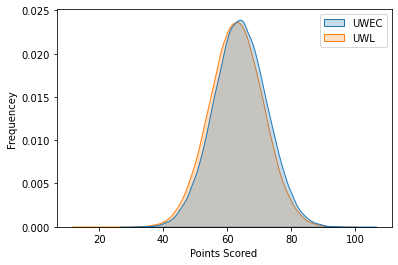

In [1412]:
sns.kdeplot(data=monte_carlo_game, fill = True);
  
plt.xlabel('Points Scored')
plt.ylabel('Frequencey')

In [1413]:
print(monte_carlo_game.mean())
chances = 100 * sim_out[0]
team_2_chances = 100 - chances
print('team_1 Win chances: ' ,chances)
print('team_2 Win chances: ', team_2_chances)

UWEC    63.88583
UWL     62.70004
dtype: float64
team_1 Win chances:  52.332
team_2 Win chances:  47.668
